# Import

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Functions

In [0]:
def generateX(n,m):
  temp=np.ones((n,1))
  temp2 = np.random.normal(0, 1, (n, m))
  X=np.concatenate((temp,temp2),axis=1)
  return X,temp,temp2

def generateWeight(n,m):
  W=np.random.normal(0,1,(m+1,1))
  return W

def generateNoise(n,m):
  N=np.random.normal(0,0.2,(n,1))
  return N;

def closedform(X,Yn):
  Xt=np.transpose(X)
  What=np.matmul((np.matmul((np.linalg.pinv(np.matmul(Xt,X))),Xt)),Yn)  
  return What

def calculateMSE(X,What):
  Yhat=np.matmul(X,What)
  mse=np.square(Y-Yhat).mean()
  return Yhat,mse
  
def linearregression(n,m,X,Yn):
  step=0.001
  tolerance=1e-20
  currentweight=generateWeight(n,m)
  i=0
  while(1):
    i=i+1
    previousweight=currentweight
    error=(np.matmul(X,currentweight))-Yn
    currentweight=previousweight-step*(1/n)*np.dot(np.transpose(X),error)
    difference=np.mean(currentweight-previousweight)
    if(abs(difference)<tolerance):
      break
  print(i)
  return currentweight


# Driver Code

Closed Form MSE: 1.6487932756395583e-05
29451
Gradient Descent MSE: 1.6487932756203652e-05


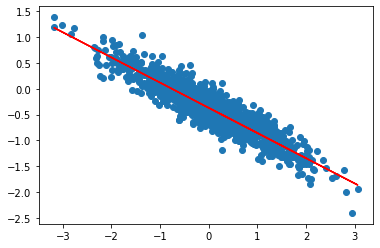

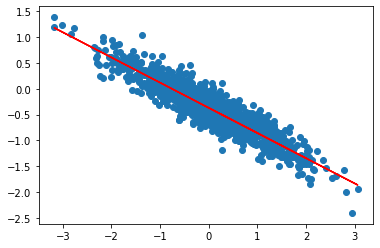

In [3]:
n=1000
m=1

X,temp,temp2=generateX(n,m)
#print(X)
W=generateWeight(n,m)
#print(W)
N=generateNoise(n,m)
#print(N)
Y=np.matmul(X,W)
Yn=Y+N



What=closedform(X,Yn)

Yhat,closedmse=calculateMSE(X,What)


print("Closed Form MSE:",closedmse)


currentweight=linearregression(n,m,X,Yn)

Yht,linearmse=calculateMSE(X,currentweight)


print("Gradient Descent MSE:",linearmse)

plt.figure()
plt.scatter(temp2,Yn)
plt.plot(temp2,Yhat,'r')

plt.figure()
plt.scatter(temp2,Yn)
plt.plot(temp2,Yht,'r')

plt.show()